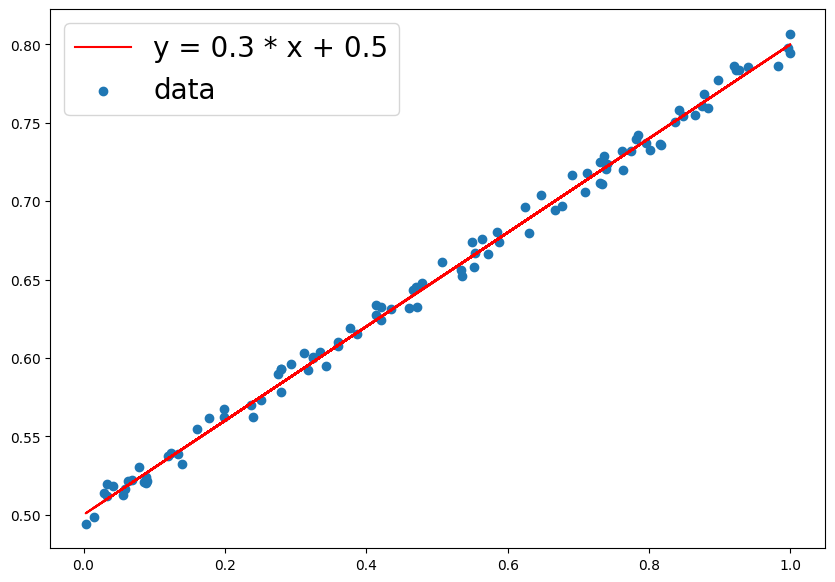

w: 0.3, b: 0.5


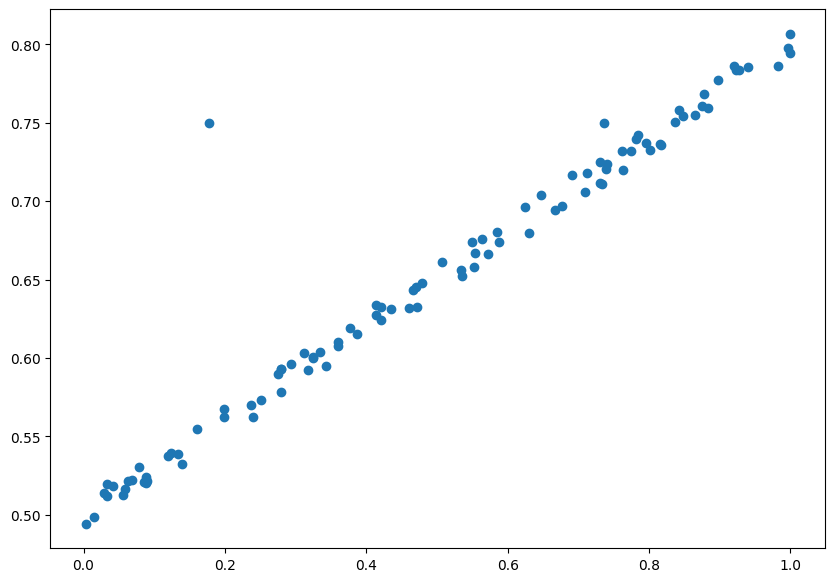

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10,7))
    plt.plot(x,y, color='r', label=f'y = {w} * x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x,y)
plt.show()

w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

y_hat = w * x + b

error = (y_hat - y) ** 2

단항식 (Monomial)에 대한 경사하강법

0 w = 0.04927016920318342, b = 0.3532613317328948 error = 0.571887799736538
5 w = 0.18548879752255748, b = 0.5610258254111592 error = 0.0015366974887875229
10 w = 0.20363637312029473, b = 0.553387637158818 error = 0.001183633777569036
15 w = 0.21816561627547648, b = 0.545727631711842 error = 0.0009554029115971882
20 w = 0.23032771142162925, b = 0.5393043743375059 error = 0.0007953607921672923
25 w = 0.24051217706926217, b = 0.5339254988097807 error = 0.0006831339475708175
30 w = 0.2490406144570181, b = 0.5294212459320617 error = 0.0006044367602426446
35 w = 0.25618229951890586, b = 0.5256493995712884 error = 0.0005492516811678986
40 w = 0.26216272280342207, b = 0.5224908679913741 error = 0.0005105540725762927
------------------------------------------------------------
42 w = 0.26323664730073326, b = 0.5219236799717596, error = 0.0004985332145696403


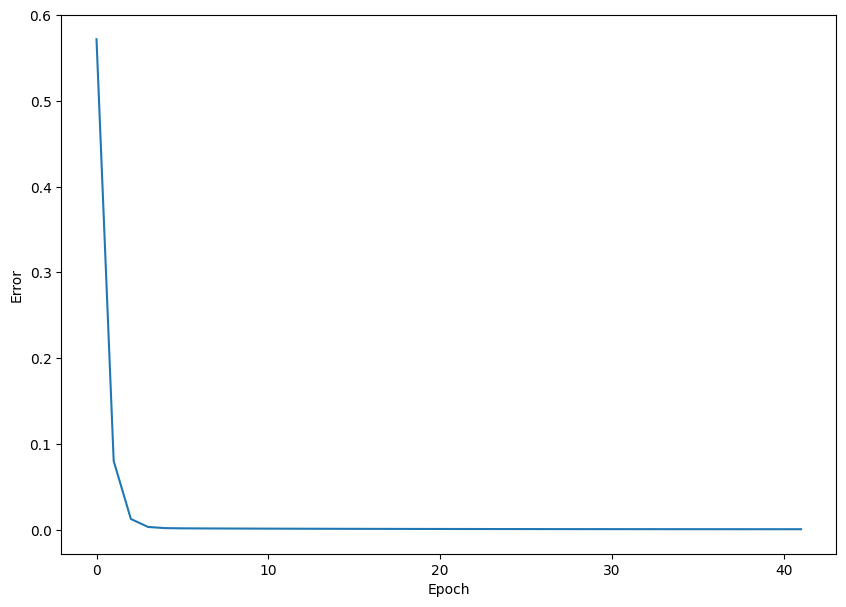

In [2]:
num_epoch = 5000

learning_rate = 0.5

errors = []
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b
    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break
    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    errors.append(error)
    if epoch % 5 == 0:
        print(f"{epoch} w = {w}, b = {b} error = {error}")
    
print('----' * 15)
print(f"{epoch} w = {w}, b = {b}, error = {error}")

plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

다항식 (Polynomial)에 대한 경사하강법

0 w1 = 0.16945214083750648, w2 = -0.1953257635684313, w3 = 0.16478919199815906, b = -0.08982858387923798, error = 1.4333717223459967
5 w1 = 0.18907280547203956, w2 = -0.05740626902289708, w3 = 0.28863080071911545, b = -0.09189636598768165, error = 0.05072075121595764
10 w1 = 0.17626684416119762, w2 = 0.023640327476576052, w3 = 0.35765969753781285, b = -0.1625750552939654, error = 0.03678581999744659
15 w1 = 0.1699978692002157, w2 = 0.09185593968976154, w3 = 0.414836475389173, b = -0.22393728245873148, error = 0.026891259891691548
20 w1 = 0.16851383143182724, w2 = 0.1494336465212013, w3 = 0.4622399644590616, b = -0.2772699690539832, error = 0.019806216862714193
25 w1 = 0.17046077463844025, w2 = 0.19816856326655433, w3 = 0.5015767313700398, b = -0.32367367101049743, error = 0.014690649518841024
30 w1 = 0.17479907700077502, w2 = 0.23953360546525468, w3 = 0.5342495585684174, b = -0.36408970002945623, error = 0.010967190328414565
35 w1 = 0.18073603885637776, w2 = 0.27473979443173663, w3 = 0

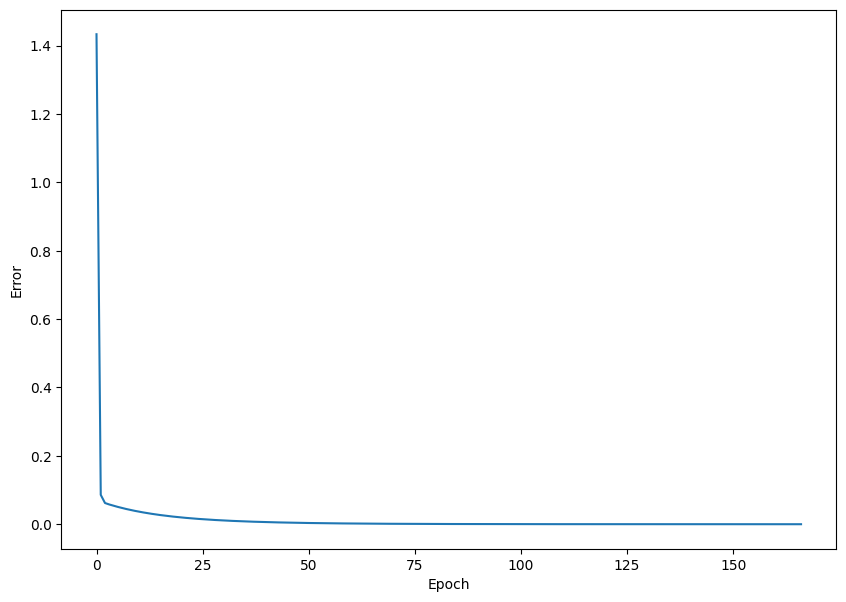

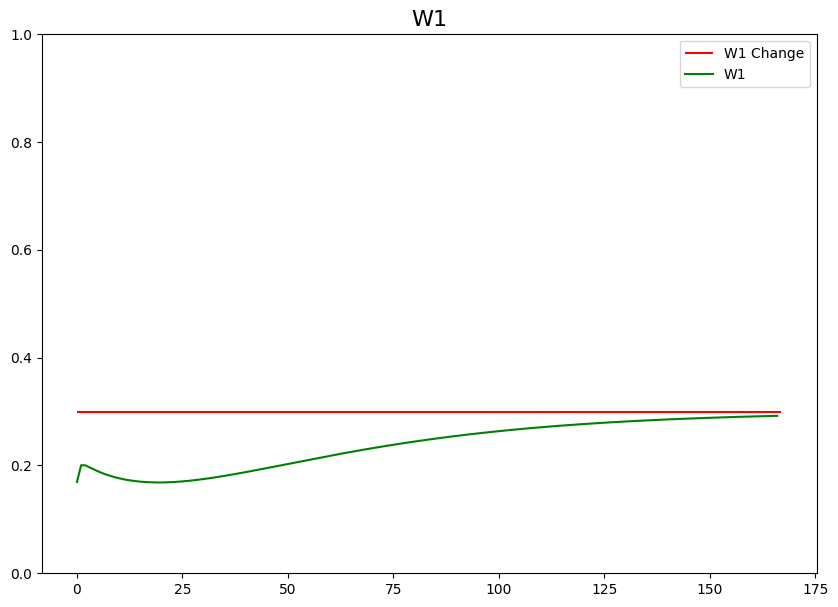

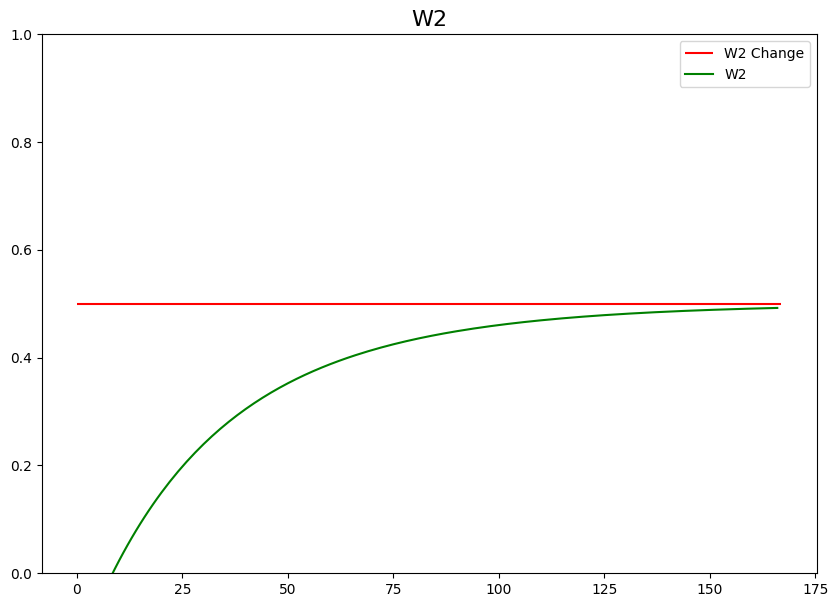

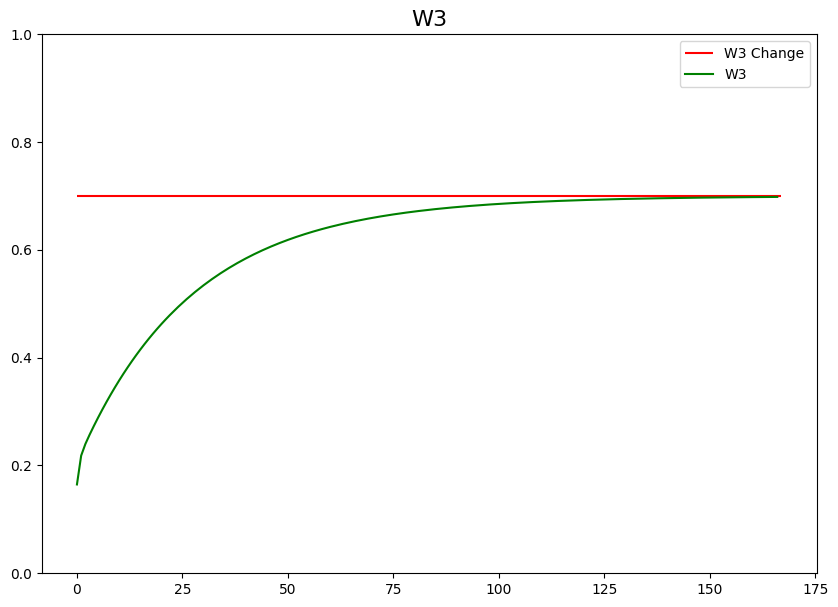

In [5]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + b

errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch = 5000
learning_rate = 0.5

b1 = np.random.uniform(low=-1.0, high=1.0)
b2 = np.random.uniform(low=-1.0, high=1.0)
b3 = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b
    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)
    
    b = b - learning_rate * (y_hat - y).mean()
    errors.append(error)
    if epoch % 5 == 0:
        print(f"{epoch} w1 = {w1}, w2 = {w2}, w3 = {w3}, b = {b}, error = {error}")

print("----"*15)
print(f"{epoch} w1 = {w1}, w2 = {w2}, w3 = {w3}, b = {b}, error = {error}")

plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

plt.figure(figsize=(10,7))
plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

plt.figure(figsize=(10,7))
plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0,1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

plt.figure(figsize=(10,7))
plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0,1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()
              

 SGD (Stochastic Gradient Descent) 선형회기

Dimension of data x =  (100, 3)
-- Epoch 1
Norm: 0.14, NNZs: 3, Bias: 0.075031, T: 100, Avg. loss: 0.036552
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 3, Bias: 0.060276, T: 200, Avg. loss: 0.025311
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 3, Bias: 0.033207, T: 300, Avg. loss: 0.022557
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 3, Bias: -0.000157, T: 400, Avg. loss: 0.020177
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.30, NNZs: 3, Bias: -0.027867, T: 500, Avg. loss: 0.018160
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 3, Bias: -0.047297, T: 600, Avg. loss: 0.016292
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.37, NNZs: 3, Bias: -0.071752, T: 700, Avg. loss: 0.014614
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.40, NNZs: 3, Bias: -0.097913, T: 800, Avg. loss: 0.013161
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 3, Bias: -0.117729, T: 900, Avg. loss: 0.01181

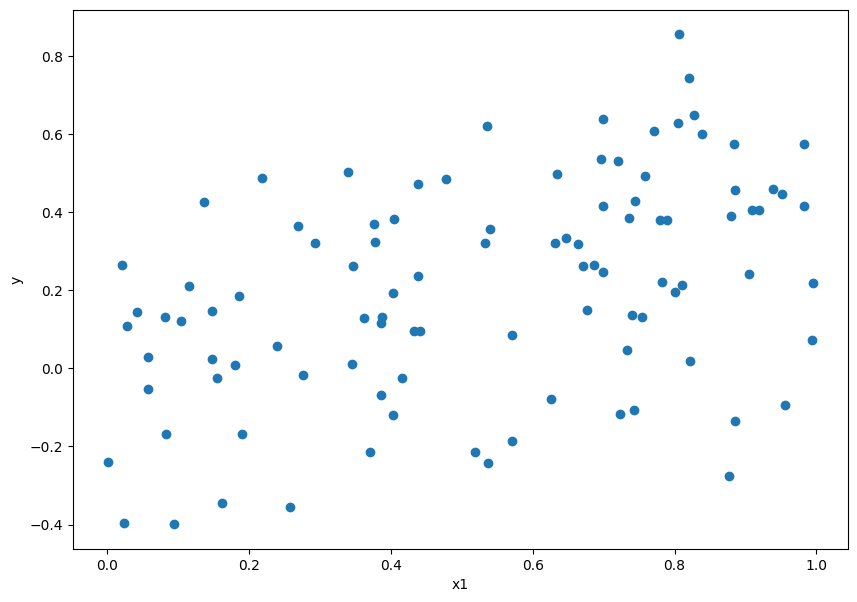

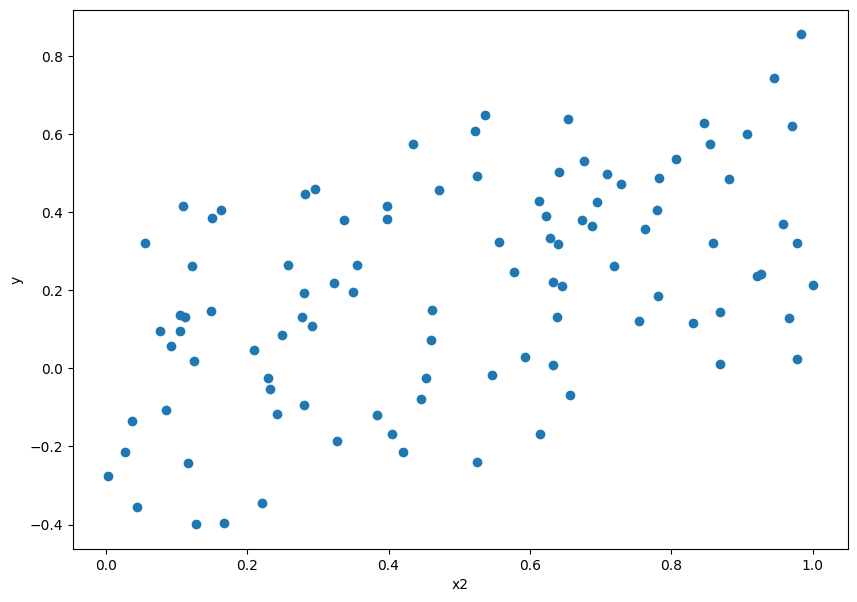

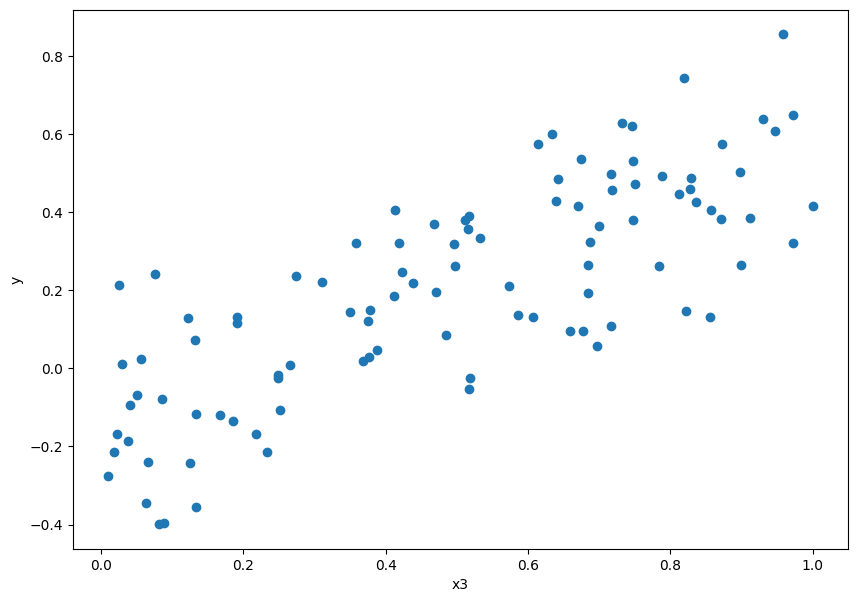

Coefficients: [0.28439294 0.47529589 0.68114426]
Intercept: [-0.51726816]
w1 = 0.284392937735213, w2 = 0.4752958934056316, w3 = 0.6811442644332976, b = -0.517268164202919


In [4]:
from sklearn.linear_model import SGDRegressor

x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
x3 = x3.reshape(-1,1)

x = np.concatenate([x1, x2, x3], axis=1)
print('Dimension of data x = ', x.shape)

model = SGDRegressor(max_iter=200, tol=1e-5, learning_rate='constant', verbose=1)
model.fit(x,y)

plt.figure(figsize=(10,7))
plt.scatter(x1,y)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(x2,y)
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(x3,y)
plt.xlabel('x3')
plt.ylabel('y')
plt.show()

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print(f"w1 = {model.coef_[0]}, w2 = {model.coef_[1]}, w3 = {model.coef_[2]}, b = {model.intercept_[0]}")